In [1]:
import sys
from pathlib import Path

# 项目根目录
proj_root = Path("/home/yangk/intership_2025_COSYS")

# src路径
src_dir = proj_root / "src"
# 加入 sys.path
if str(src_dir) not in sys.path:
    sys.path.append(str(src_dir))

from pl_model import LitModel 
from dataset import BIPEDv2

In [2]:
import pandas as pd

# Load model
point_dir = proj_root / "data/checkpoints" / "pl_point08"
model = LitModel.load_from_checkpoint(str(point_dir / "model.ckpt"))

# Load log
log_metrics = pd.read_csv(str(point_dir/"lightning_logs/version_0/metrics.csv"))

# Load data
data_dir = proj_root / "data/BIPEDv2/BIPED/edges"
test_dataset = BIPEDv2(
    data_dir / "imgs" / "test" / "rgbr",
    data_dir / "edge_maps" / "test" / "rgbr"
)

# Display evolution of loss

In [3]:
train_loss = log_metrics["train_loss_epoch"]
train_loss = train_loss[~pd.isna(train_loss)].to_list()

val_loss = log_metrics["val_loss"]
val_loss = val_loss[~pd.isna(val_loss)].to_list()

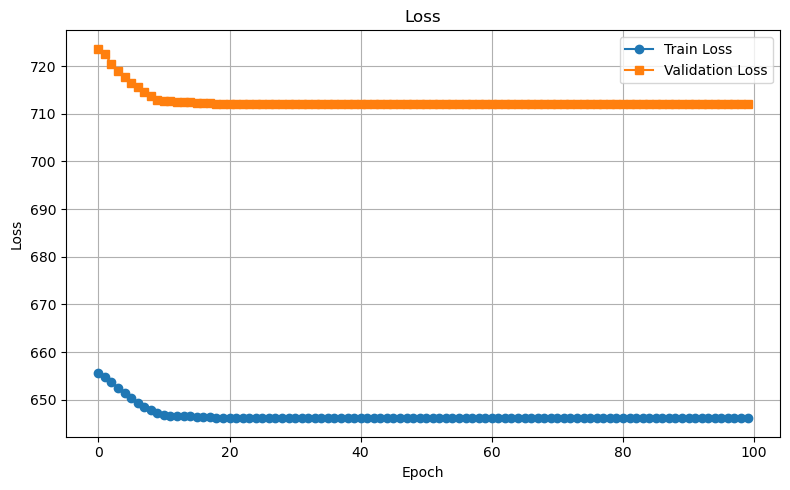

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='s')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Inference

In [5]:
test_item = test_dataset[0]

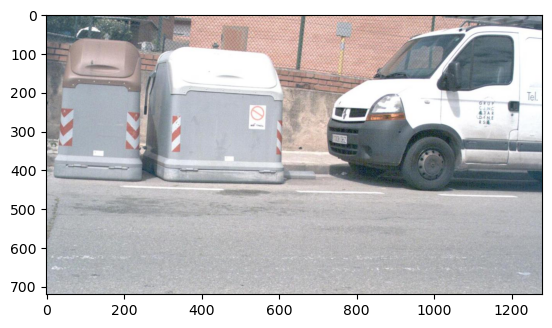

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

plt.imshow(Image.open(test_item['image_path']))
plt.show()

In [7]:
import torch

with torch.no_grad():
    outputs = model(test_item['image_tensor'].unsqueeze(0))
    pred = outputs[-1].squeeze()

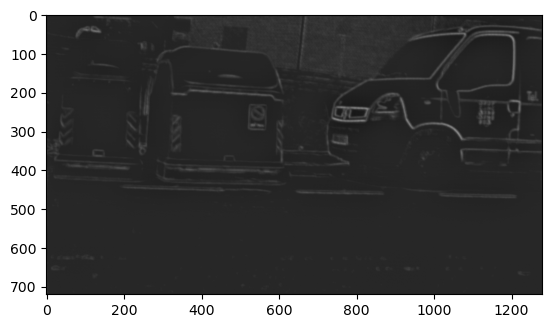

In [8]:
plt.imshow(pred.detach().numpy(), cmap="gray")
plt.show()